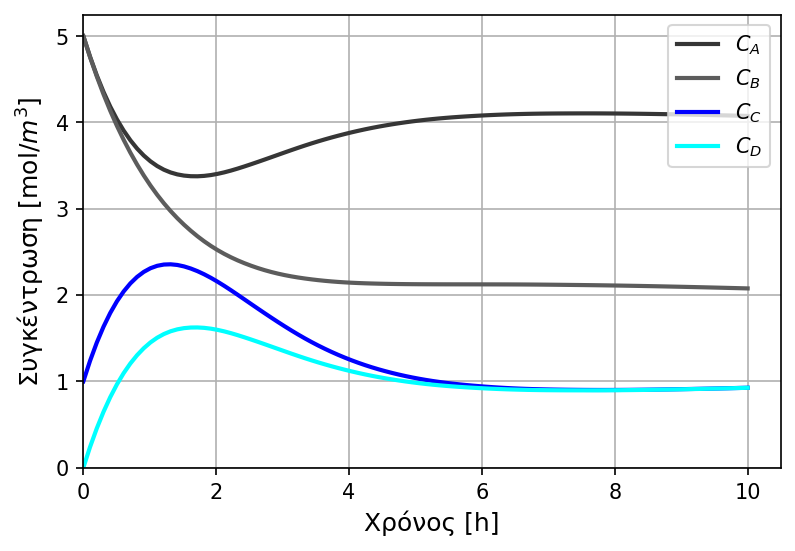

In [44]:
# Import necessary libraries
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of differential equations
def SXA_I_Example_6p2(t, x):
    # Model Parameters
    k1 = 0.1        # forward reaction constant (m^3*mol^-1*h^-1)
    k2 = 0.04       # reverse reaction constant (m^3*mol^-1*h^-1)
    Qo = 0.3 * t    # Volumetric flow rate in (m^3/h)
    Qe = 0.25 * t   # Volumetric flow rate out (m^3/h)

    # Concentration of species in inlet stream
    Cao = 5  # Concentration of A in inlet stream (mol/m^3)
    Cbo = 3  # Concentration of B in inlet stream (mol/m^3)
    Cco = 0  # Concentration of C in inlet stream (mol/m^3)
    Cdo = 0  # Concentration of D in inlet stream (mol/m^3)

    # Rate Equation
    R = k1 * x[0] * x[1] - k2 * x[2] * x[3]  # Reaction rate

    # Differential Equations
    dx = np.zeros(5)
    dx[0] = Qo * (Cao - x[0]) / x[4] - R         # d[A]/dt
    dx[1] = Qo * (Cbo - x[1]) / x[4] - R         # d[B]/dt
    dx[2] = Qo * (Cco - x[2]) / x[4] + R         # d[C]/dt
    dx[3] = Qo * (Cdo - x[3]) / x[4] + R         # d[D]/dt
    dx[4] = Qo - Qe                              # d[V]/dt

    return dx

# Set the time span for integration
t_span = (0, 10)  # Time range in hours
t_eval = np.linspace(0, 10, 100)  # Time points for evaluation

# Initial conditions: [A0, B0, C0, D0, V0]
initial_conditions = [5, 5, 1, 0, 1]  # Initial values for [A], [B], [C], [D], and volume V

# Solve the ODE system using solve_ivp
sol = solve_ivp(SXA_I_Example_6p2, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for each component
A = sol.y[0, :]
B = sol.y[1, :]
C = sol.y[2, :]
D = sol.y[3, :]
V = sol.y[4, :]
time = sol.t

# Plot the results
plt.figure(dpi=150)  # Set high DPI for a large, high-resolution plot
plt.plot(time, A, label='$C_A$', linestyle='-', color='#363636', linewidth=2)
plt.plot(time, B, label='$C_B$', linestyle='-', color='#5C5C5C', linewidth=2)
plt.plot(time, C, label='$C_C$', linestyle='-', color='blue', linewidth=2)
plt.plot(time, D, label='$C_D$', linestyle='-', color='cyan', linewidth=2)

# Set the plot to start at the origin
plt.xlim(left=0)  # Start x-axis at 0
plt.ylim(bottom=0)  # Start y-axis at 0

# Customize plot with labels, title, and legend
plt.xlabel('Χρόνος [h]', fontsize=12)
plt.ylabel('Συγκέντρωση [mol/$m^3$]', fontsize=12)
#plt.title('Concentration Profiles of Species', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


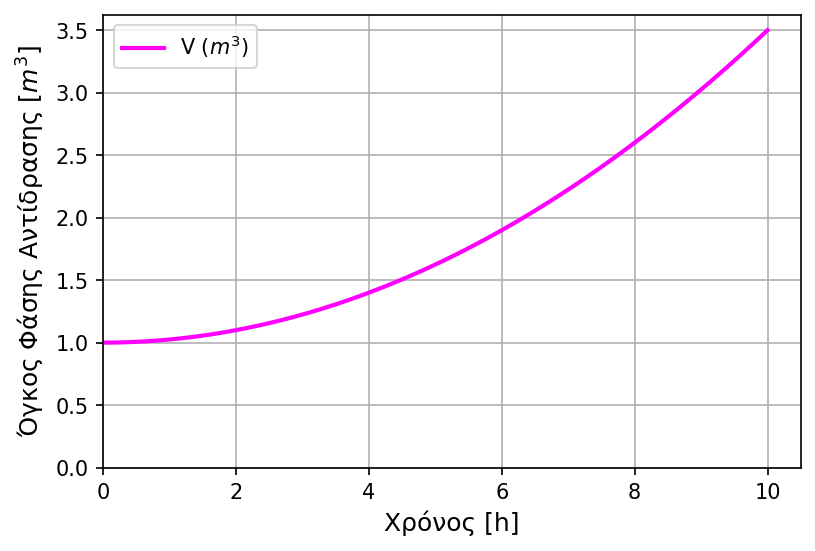

In [48]:
# Plot the evolution of reactor volume over time
plt.figure(dpi=150)  # Set high DPI for a large, high-resolution plot
plt.plot(time, V, label='V ($m^3$)', color='magenta', linestyle='-', linewidth=2)

# Set the plot to start at the origin
plt.xlim(left=0)  # Start x-axis at 0
plt.ylim(bottom=0)  # Start y-axis at 0

# Customize plot with labels, title, and legend
plt.xlabel('Χρόνος [h]', fontsize=12)
plt.ylabel('Όγκος Φάσης Αντίδρασης [$m^3$]', fontsize=12)
#plt.title('Reactor Volume Over Time', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

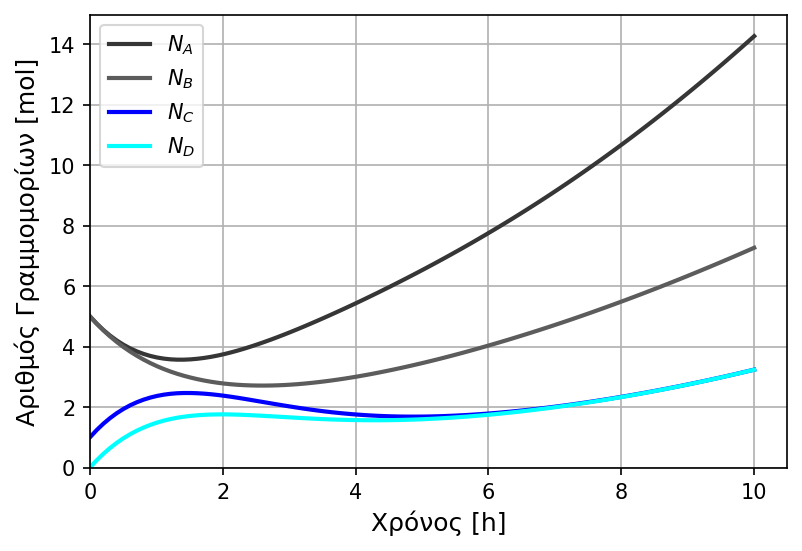

In [47]:
# Define the system of differential equations
def SXA_I_Example_6p2b(t, n):
    # Model Parameters
    k1 = 0.1        # forward reaction constant (m^3*mol^-1*h^-1)
    k2 = 0.04       # reverse reaction constant (m^3*mol^-1*h^-1)
    Qo = 0.3 * t    # Volumetric flow rate in (m^3/h)
    Qe = 0.25 * t   # Volumetric flow rate out (m^3/h)

    # Concentration of species in inlet stream
    Cao = 5  # Concentration of A in inlet stream (mol/m^3)
    Cbo = 3  # Concentration of B in inlet stream (mol/m^3)
    Cco = 0  # Concentration of C in inlet stream (mol/m^3)
    Cdo = 0  # Concentration of D in inlet stream (mol/m^3)

    # Rate Equation
    R = k1 * n[0] * n[1]/n[4] - k2 * n[2] * n[3]/n[4]  # Reaction rate

    # Differential Equations
    dn = np.zeros(5)
    dn[0] = Qo*Cao-Qe*n[0]/n[4] - R       # d[NA]/dt (mol/h)
    dn[1] = Qo*Cbo-Qe*n[1]/n[4] - R       # d[NB]/dt (mol/h)
    dn[2] = Qo*Cco-Qe*n[2]/n[4] + R       # d[NC]/dt (mol/h)
    dn[3] = Qo*Cdo-Qe*n[3]/n[4] + R       # d[ND]/dt (mol/h)
    dn[4] = Qo - Qe                       # d[V]/dt  (m^3/h)
    
    return dn

# Set the time span for integration
t_span = (0, 10)  # Time range in hours
t_eval = np.linspace(0, 10, 100)  # Time points for evaluation

# Initial conditions: [NA0, NB0, NC0, ND0, V0]
initial_conditions = [5, 5, 1, 0, 1]  # Initial values for [A], [B], [C], [D], and volume V

# Solve the ODE system using solve_ivp
sol_b = solve_ivp(SXA_I_Example_6p2b, t_span, initial_conditions, t_eval=t_eval)

# Extract the solution for each component
NA = sol_b.y[0, :]
NB = sol_b.y[1, :]
NC = sol_b.y[2, :]
ND = sol_b.y[3, :]
V = sol_b.y[4, :]
time = sol_b.t

# Plot the results
plt.figure(dpi=150)  # Set high DPI for a large, high-resolution plot
plt.plot(time, NA, label='$N_A$', linestyle='-', color='#363636', linewidth=2)
plt.plot(time, NB, label='$N_B$', linestyle='-', color='#5C5C5C', linewidth=2)
plt.plot(time, NC, label='$N_C$', linestyle='-', color='blue', linewidth=2)
plt.plot(time, ND, label='$N_D$', linestyle='-', color='cyan', linewidth=2)

# Set the plot to start at the origin
plt.xlim(left=0)  # Start x-axis at 0
plt.ylim(bottom=0)  # Start y-axis at 0

# Customize plot with labels, title, and legend
plt.xlabel('Χρόνος [h]', fontsize=12)
plt.ylabel('Αριθμός Γραμμομορίων [mol]', fontsize=12)
#plt.title('Number of Mol per Species', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()
